# 107810037 機械四丙 蘇勇達

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_cases = pd.read_csv(url)

In [5]:
confirmed_cases.drop(columns=['Lat','Long'], inplace=True)
confirmed_cases = confirmed_cases.groupby('Country/Region').sum()
confirmed_cases.columns = pd.to_datetime(confirmed_cases.columns)

confirmed_cases = confirmed_cases.transpose()
confirmed_cases.index.name = 'date'

In [7]:
# countries to show in below, 
# please refer `confirmed_cases.columns` to find valid representation of Country/Region
countries = [
    'Brazil', 
    'Russia', 
    'Indonesia', 
    'China', 
    'South Africa'
]
confirmed_cases = confirmed_cases[countries]
confirmed_cases

Country/Region,Brazil,Russia,Indonesia,China,South Africa
date,,,,,
2020-01-22,0,0,0,548,0
2020-01-23,0,0,0,643,0
2020-01-24,0,0,0,920,0
2020-01-25,0,0,0,1406,0
2020-01-26,0,0,0,2075,0
...,...,...,...,...,...
2022-05-18,30701900,18007169,6051532,2376208,3908020
2022-05-19,30701900,18012019,6051850,2381653,3908020
2022-05-20,30762413,18017039,6052100,2382097,3921633


# 趨勢圖_確診總數

<AxesSubplot:title={'center':'Total Confirmed Cases'}, xlabel='date'>

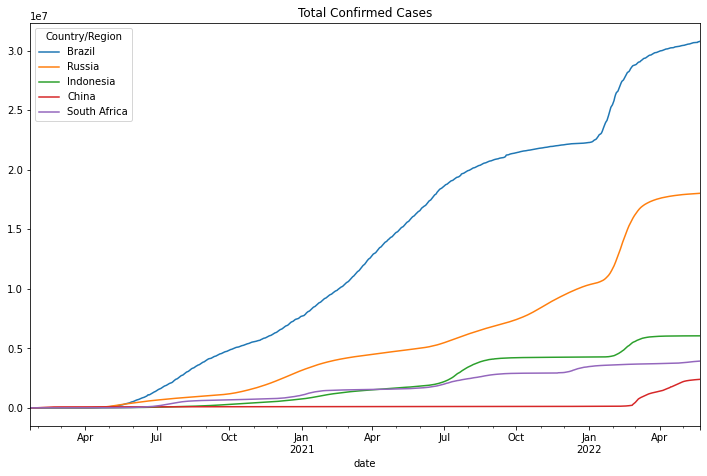

In [8]:
figsize = (12, 12 * 2 / (1 + 5**0.5))
confirmed_cases.plot(
    figsize=figsize,
    title='Total Confirmed Cases',
)

# 趨勢圖_確診總數 (log)

<AxesSubplot:title={'center':'Total Confirmed Cases'}, xlabel='date'>

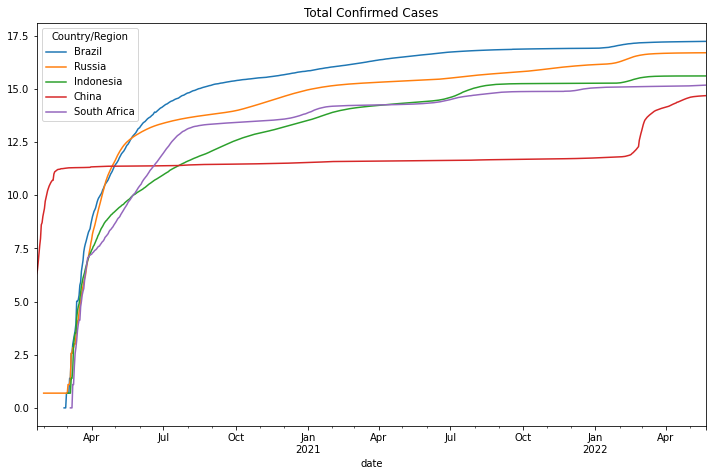

In [9]:
figsize = (12, 12 * 2 / (1 + 5**0.5))
confirmed_cases.apply(np.log).plot(
    figsize=figsize,
    title='Total Confirmed Cases',
)

# 趨勢圖_新增確診數 (smooth)

<AxesSubplot:title={'center':'New Cases Per Day after Smoothing (Smoothed)'}, xlabel='date'>

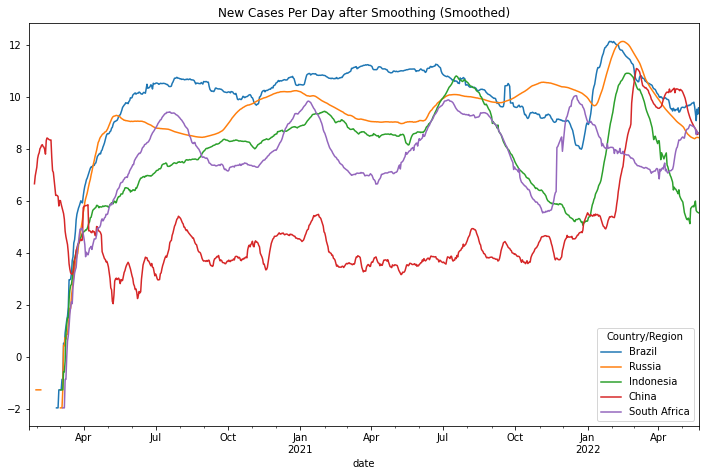

In [11]:
cases_diff = confirmed_cases.diff()

cases_diff = cases_diff.rolling(window=7, win_type=None).mean()
cases_diff.apply(np.log).plot(
    figsize=figsize,
    title='New Cases Per Day after Smoothing (Smoothed)',
)

# 趨勢圖_確診走向

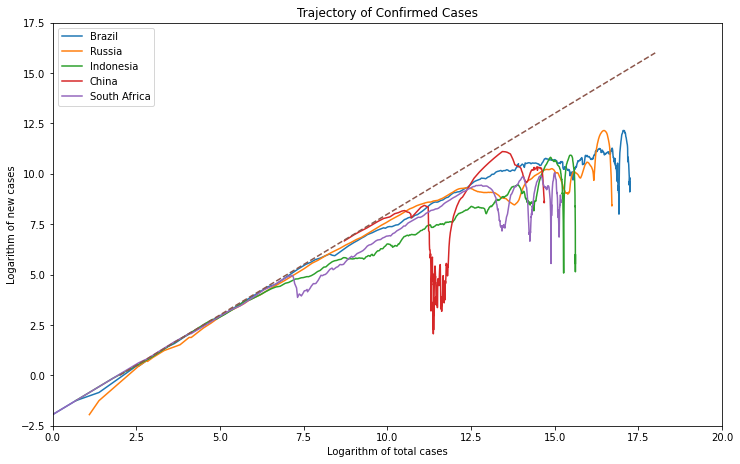

In [12]:
plt.figure(figsize=figsize)
plt.title('Trajectory of Confirmed Cases')
plt.xlabel('Logarithm of total cases')
plt.ylabel('Logarithm of new cases')
plt.xlim((0, 20))
plt.ylim((-2.5, 17.5))
for col in confirmed_cases.columns:
    plt.plot(
        confirmed_cases[col].apply(np.log), 
        cases_diff[col].apply(np.log),
        label=col,
    )
plt.plot([2,18], [0, 16], linestyle='--')
plt.legend()